<a href="https://colab.research.google.com/github/shahd1995913/Tahalf-Mechine-Learning-DS3/blob/main/Tasks/ML1_S5_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML1-S5 (Assignment)
----

## Problem 1:  Logistic Regression
---

- Mention 2 types of regularization used to overcome the overfitting problem and what is the difference between them.

- Using the data below in X,y. Build a **`logistic model`** to predict the output and evaluate the model with a confusion matrix.

# Common causes for overfitting are :
1. When the model is complex enough that it starts modeling the noise in the training data.
2. When the training data is relatively small and is an insufficient representation of the underlying distribution that it is sampled from, the model fails to learn a generalizable mapping.

---

 
##  Lasso(also known as L1) and Ridge(also known as L2) regression are two popular regularization techniques that are used to avoid overfitting of data. 
## These methods are used to penalize the coefficients to find the optimum solution and reduce complexity.
##  The difference between L1 and L2 regularization techniques lies in the nature of this regularization term. In general, the addition of this regularization term causes the values of the weight matrices to reduce, leading simpler models.
---
# L2 and L1 Regularization : LASSO vs Ridge
1. Lasso regression
- Lasso regression is a regularization technique used to reduce model complexity.
-  It is also known as L1 regularization. 
- Lasso stands for Least Absolute Shrinkage and Selector Operator.
-   The Lasso regression works by penalizing the sum of the absolute values of the coefficients.

2. Ridge regression
- Ridge regression refers to a type of linear regression where in order to get better predictions in the long term, we introduce a small amount of bias.
-  It is also known as L2 regularization.
- In Ridge or L2 regression, the penalty function is determined by the sum of the squares of the coefficients.
-  In ridge regression, we have the same loss function with a slight alteration in the penalty term.


In [1]:
### Put Your Answer Here ####
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [53]:
# Dataset
X = np.arange(15).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [54]:
X

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14]])

In [55]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [56]:
x_train, x_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=0)

In [57]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [58]:
model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr',
                         random_state=0)
model.fit(x_train, y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

In [59]:
model.predict_proba(x_train)

array([[0.48034823, 0.51965177],
       [0.41559875, 0.58440125],
       [0.54576465, 0.45423535],
       [0.57161916, 0.42838084],
       [0.42838984, 0.57161016],
       [0.46727395, 0.53272605],
       [0.50655972, 0.49344028],
       [0.45424447, 0.54575553],
       [0.55873171, 0.44126829],
       [0.59708849, 0.40291151],
       [0.5327352 , 0.4672648 ],
       [0.44127735, 0.55872265]])

In [60]:
x_test = scaler.transform(x_test)

In [61]:
y_pred = model.predict(x_test)

In [63]:
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


1.0
1.0
Accuracy: 1.0


In [64]:
confusion_matrix(y_test, y_pred)

array([[2, 0],
       [0, 1]])

In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



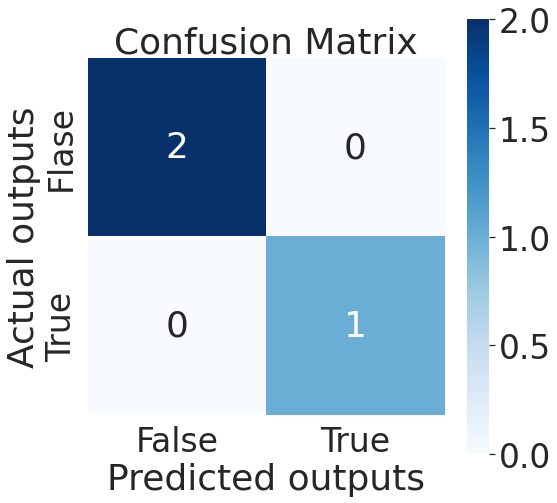

In [67]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
# ax = plt.subplot()
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
sns.set(font_scale=3.0) #edited as suggested
sns.heatmap(cm, annot=True, ax=ax, cmap="Blues", fmt="g");  # annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted outputs');
ax.set_ylabel('Actual outputs');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['False', 'True']);
ax.yaxis.set_ticklabels(['Flase', 'True']);
plt.show()

## Problem 2:  KNN + metrics
---
Build a classification model based on KNN to classify the [Iris Dataset](https://archive.ics.uci.edu/ml/datasets/iris) , report the training and testing `accuracy` ,`f1score` , `recall` , `percision`.

In [30]:
import pandas as pd
import numpy as np
import math
import operator
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score , precision_score , roc_auc_score ,roc_curve
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") #to remove unwanted warnings
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report, confusion_matrix
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

In [33]:
#Loading the Data
iris= load_iris()

In [34]:
# Split X and Y
#======================
X= iris.data

Y= iris.target

X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size= 0.3,random_state=32)
print(f'training set size: {X_train.shape[0]} samples \ntest set size: {X_test.shape[0]} samples')

training set size: 105 samples 
test set size: 45 samples


In [35]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [36]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy when number of neighbors 3 :===>",metrics.accuracy_score(y_test, y_pred))

Accuracy when number of neighbors 3 :===> 1.0


In [37]:
custom_model_score = accuracy_score(y_test,y_pred)
print(custom_model_score)
print(classification_report(y_test,y_pred))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



## Problem 3: Naive Bayes
---

- Build a gaussian naive bayes model on [Iris Dataset](https://archive.ics.uci.edu/ml/datasets/iris) , you can load the data using sklearn , split the data to train 70% and test 30%.

- If we have a discrete data which type of naive bayes should we use?

- Create a dataset with 0 and 1 ,the training data will have 1000 instance and each instance will have 8 features , the testing data will have 100 instance and build a naive bayes model on it .

In [39]:
### Start Your Code Here ####

#Loading the Data
iris= load_iris()

# Split X and Y
#======================
Naive_X= iris.data
Naive_y= iris.target


Naive_X_train, Naive_X_test, Naive_y_train, Naive_y_test = train_test_split(Naive_X, Naive_y, test_size = 0.3)
print(f'training set size: {Naive_X_train.shape[0]} samples \ntest set size: {Naive_X_test.shape[0]} samples')

training set size: 105 samples 
test set size: 45 samples


In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Naive_X_train = sc.fit_transform(Naive_X_train)
Naive_X_test = sc.transform(Naive_X_test)

In [41]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(Naive_X_train, Naive_y_train)

GaussianNB()

In [42]:
Naive_y_pred = classifier.predict(Naive_X_test) 
Naive_y_pred

array([1, 0, 1, 0, 2, 1, 0, 2, 2, 0, 1, 0, 1, 0, 1, 1, 0, 1, 2, 2, 2, 1,
       1, 2, 2, 2, 2, 0, 2, 1, 0, 0, 2, 1, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2,
       2])

Accuracy :  0.9555555555555556
----------------------------------------------------------
Accuracy : 0.9555555555555556
              precision    recall  f1-score   support

           0       0.37      0.50      0.42        14
           1       0.25      0.23      0.24        13
           2       0.21      0.17      0.19        18

    accuracy                           0.29        45
   macro avg       0.28      0.30      0.28        45
weighted avg       0.27      0.29      0.28        45

----------------------------------------------------------


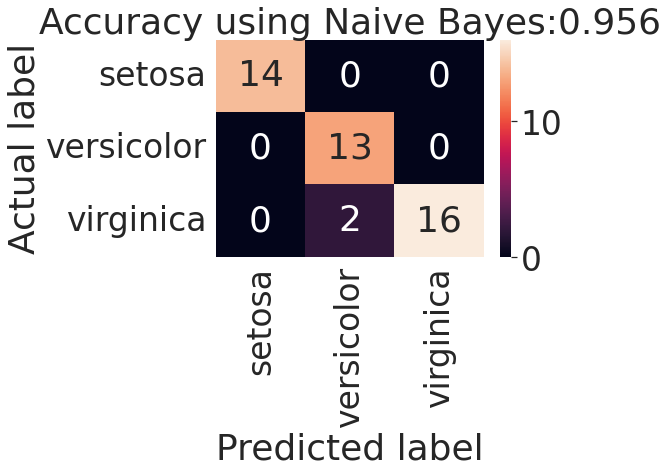

In [43]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(Naive_y_test, Naive_y_pred)
from sklearn.metrics import accuracy_score 

print ("Accuracy : ", accuracy_score(Naive_y_test, Naive_y_pred))
print("----------------------------------------------------------")

custom_model_score_naive = accuracy_score(Naive_y_test,Naive_y_pred)
print("Accuracy :",custom_model_score_naive)
print(classification_report(Naive_y_test,y_pred))
print("----------------------------------------------------------")


# print(cm1)
cm_df = pd.DataFrame(cm1,
                     index = ['setosa','versicolor','virginica'], 
                     columns = ['setosa','versicolor','virginica'])

sns.heatmap(cm_df, annot=True)
plt.title('Accuracy using Naive Bayes:{0:.3f}'.format(accuracy_score(Naive_y_test, Naive_y_pred)))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [44]:
dfNaive_ = pd.DataFrame({'Real Values':Naive_y_test, 'Predicted Values':Naive_y_pred})
dfNaive_

,Real Values,Predicted Values
0,1,1
1,0,0
2,2,1
3,0,0
4,2,2
5,1,1
6,0,0
7,2,2
8,2,2
9,0,0


# - If we have a discrete data which type of naive bayes should we use?

---
## Sol --> Bernoulli Naive Bayes
### if you have discrete features in 1s and 0s that represent the presence or absence of a feature.
###  In that case, the features will be binary and we will use Bernoulli Naive Bayes. 

---
### - Create a dataset with 0 and 1 ,the training data will have 1000 instance and each instance will have 8 features , the testing data will have 100 instance and build a naive bayes model on it 
---

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [46]:
Bayes_x,Bayes_Y=make_classification(n_samples= 1000,n_features=8,n_informative=8,n_redundant=0,n_repeated=0,n_classes=2,random_state=14)
#   If the test_size was 0.1 then that mean 100 instance
Bayes_x_train, Bayes_X_test, Bayes_y_train, Bayes_y_test= train_test_split(Bayes_x, Bayes_Y, test_size= 0.1, random_state=32)
sc= StandardScaler()
sc.fit(Bayes_x_train)
Bayes_x_train= sc.transform(Bayes_x_train)
sc. fit(Bayes_X_test)
Bayes_X_test= sc.transform(Bayes_X_test)
Bayes_x.shape                                         

(1000, 8)

In [47]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(Bayes_x_train, Bayes_y_train)

GaussianNB()

In [48]:
Bayes_y_pred = classifier.predict(Bayes_X_test) 
Bayes_y_pred

array([1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

Accuracy :  0.65
----------------------------------------------------------
Accuracy : 0.65
              precision    recall  f1-score   support

           0       0.61      0.70      0.65        47
           1       0.70      0.60      0.65        53

    accuracy                           0.65       100
   macro avg       0.65      0.65      0.65       100
weighted avg       0.66      0.65      0.65       100

----------------------------------------------------------


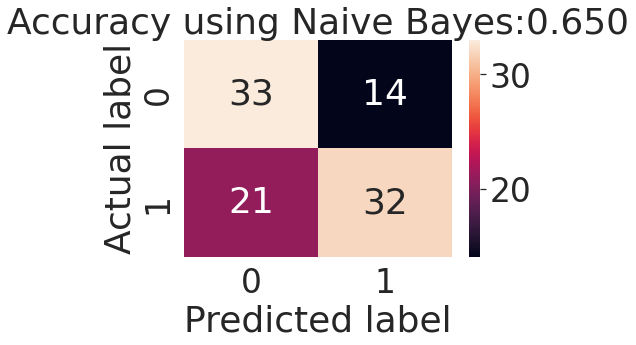

In [49]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(Bayes_y_test, Bayes_y_pred)
from sklearn.metrics import accuracy_score 

print ("Accuracy : ", accuracy_score(Bayes_y_test, Bayes_y_pred))
print("----------------------------------------------------------")

custom_model_score_Bayes = accuracy_score(Bayes_y_test,Bayes_y_pred)
print("Accuracy :",custom_model_score_Bayes)
print(classification_report(Bayes_y_test,Bayes_y_pred))
print("----------------------------------------------------------")


# print(cm1)
cm_df = pd.DataFrame(cm1)

sns.heatmap(cm_df, annot=True)
plt.title('Accuracy using Naive Bayes:{0:.3f}'.format(accuracy_score(Bayes_y_test, Bayes_y_pred)))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## How can I choose the best K in KNN  ??
1.  KNN --> K number of neighbors . 
- If the value of K is small then it lead to -- >overfitting of the model. 
-  if K is very large then i-->  underfitting of the model. 
2. KNN when be a  odd value provide a good result. 

--- > To choose the best K in KNN --- > we can also split  the entire data set into train  set and test set. then  preform  the KNN algorithm into training set and cross validate, we can use k with a cross validate to take the best result and we well repet until find a good result.